In [ ]:
!pip3 install seaborn

## import

In [2]:
import re
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import datetime
import warnings

import torch
from torch.optim import Adagrad
from sklearn.metrics import log_loss, roc_auc_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# sys.path.append("/Users/wzq/Desktop/game")
# from deepctr_torch.inputs import SparseFeat, DenseFeat, get_feature_names
# from deepctr_torch.models import *
# from deepctr_torch.callbacks import EarlyStopping, ModelCheckpoint

# jupyter配置
from IPython.display import display
pd.options.display.max_rows=10000 #Notebook 的一个cell的显示行数
pd.options.display.max_columns=100000#Notebook 的一个cell的显示列数
pd.set_option('display.max_colwidth', None)

In [5]:
data_train = pd.read_csv("./data/train.csv")
data_test = pd.read_csv("./data/testA.csv")
data = pd.concat([data_train,data_test], axis=0)
print("train_size:", data_train.shape,
      "test_size:", data_test.shape,
      "data_size:", data.shape)
display(data.head(5))
display(data.tail(5))


train_size: (800000, 47) test_size: (200000, 46) data_size: (1000000, 47)


,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014-07-01,1.0,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012-08-01,0.0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015-10-01,0.0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,1,2015-08-01,0.0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,29000.0,2,2016-03-01,0.0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
199995,999995,7000.0,3,11.14,229.64,B,B2,330967.0,7 years,1,30000.0,2,2012-10-01,NaN,4,36.0,13,32.92,0.0,685.0,689.0,8.0,0.0,0.0,5021.0,54.0,17.0,1,0,Nov-2005,52663.0,1.0,0.0,2.0,2.0,2.0,2.0,6.0,11.0,2.0,6.0,2.0,8.0,0.0,0.0,0.0,4.0
199996,999996,6000.0,3,6.24,183.19,A,A2,38930.0,1 year,1,56000.0,0,2015-10-01,NaN,0,261.0,8,20.38,0.0,720.0,724.0,25.0,0.0,0.0,10163.0,35.9,27.0,0,0,Oct-2006,0.0,1.0,0.0,5.0,6.0,6.0,5.0,5.0,14.0,12.0,13.0,6.0,25.0,0.0,0.0,0.0,0.0
199997,999997,14000.0,5,15.88,339.57,C,C4,282016.0,8 years,2,80000.0,2,2013-07-01,NaN,4,46.0,27,15.12,0.0,675.0,679.0,21.0,0.0,0.0,31401.0,86.0,63.0,0,0,Dec-2001,4.0,1.0,0.0,7.0,13.0,13.0,9.0,21.0,18.0,21.0,42.0,13.0,21.0,0.0,0.0,0.0,0.0
199998,999998,8000.0,3,18.06,289.47,D,D2,97.0,4 years,1,190000.0,0,2017-10-01,NaN,0,99.0,8,9.33,0.0,690.0,694.0,11.0,0.0,0.0,28493.0,64.0,24.0,0,0,Aug-2005,0.0,1.0,0.0,3.0,6.0,6.0,4.0,12.0,5.0,8.0,19.0,6.0,11.0,0.0,0.0,0.0,2.0
199999,999999,8000.0,3,6.68,245.85,A,A3,320.0,7 years,1,46000.0,0,2015-02-01,NaN,4,31.0,2,6.47,0.0,715.0,719.0,4.0,0.0,0.0,7608.0,65.6,10.0,0,0,Aug-2002,4.0,1.0,0.0,2.0,2.0,2.0,2.0,3.0,4.0,3.0,4.0,2.0,4.0,0.0,0.0,0.0,0.0


,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
199980,999980,12000.0,3,14.49,413.00,C,C4,7103.0,8 years,0,68000.0,1,2014-08-01,NaN,0,139.0,8,3.92,0.0,660.0,664.0,6.0,0.0,0.0,10002.0,38.0,24.0,0,0,Nov-2000,0.0,1.0,0.0,2.0,5.0,5.0,2.0,4.0,3.0,6.0,19.0,5.0,6.0,0.0,0.0,0.0,1.0
199981,999981,7000.0,3,10.99,229.14,B,B4,6610.0,3 years,0,49000.0,1,2015-09-01,NaN,0,512.0,21,25.77,0.0,685.0,689.0,15.0,0.0,0.0,21707.0,47.8,30.0,1,0,Feb-2008,0.0,1.0,0.0,6.0,11.0,11.0,6.0,7.0,15.0,12.0,14.0,11.0,15.0,0.0,0.0,0.0,3.0
199982,999982,17450.0,3,11.67,576.85,B,B4,184.0,10+ years,0,52000.0,1,2014-11-01,NaN,0,258.0,8,24.53,1.0,670.0,674.0,12.0,0.0,0.0,42861.0,85.9,20.0,1,0,Dec-1992,0.0,1.0,0.0,6.0,9.0,9.0,6.0,10.0,3.0,11.0,16.0,9.0,12.0,0.0,0.0,0.0,0.0
199983,999983,12000.0,5,26.24,361.00,E,E5,1.0,< 1 year,1,150000.0,1,2017-03-01,NaN,4,18.0,12,18.13,0.0,720.0,724.0,14.0,0.0,0.0,8986.0,59.1,49.0,0,0,Feb-2001,4.0,1.0,0.0,1.0,1.0,1.0,1.0,3.0,37.0,2.0,5.0,1.0,14.0,0.0,0.0,0.0,6.0
199984,999984,7000.0,3,13.99,239.21,C,C3,228009.0,< 1 year,1,90000.0,2,2011-07-01,NaN,0,225.0,18,6.95,0.0,675.0,679.0,7.0,0.0,0.0,10026.0,72.1,12.0,1,0,May-1984,6290.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199985,999985,14000.0,3,6.62,429.86,A,A2,4066.0,4 years,0,80000.0,0,2013-12-01,NaN,4,163.0,21,16.25,0.0,710.0,714.0,10.0,0.0,0.0,15640.0,59.2,30.0,1,0,Apr-2003,26.0,1.0,0.0,5.0,5.0,5.0,5.0,9.0,19.0,5.0,9.0,5.0,10.0,0.0,0.0,0.0,2.0
199986,999986,32000.0,5,15.59,771.23,C,C5,362638.0,< 1 year,0,118000.0,1,2016-07-01,NaN,2,122.0,9,8.06,0.0,700.0,704.0,10.0,0.0,0.0,5137.0,32.1,17.0,0,0,Aug-2006,5.0,1.0,1.0,2.0,3.0,3.0,4.0,4.0,5.0,5.0,6.0,3.0,10.0,0.0,0.0,0.0,2.0
199987,999987,16000.0,3,15.99,562.44,C,C5,251013.0,5 years,1,110000.0,1,2017-02-01,NaN,0,166.0,8,14.96,0.0,675.0,679.0,10.0,0.0,0.0,22488.0,36.5,11.0,1,0,May-1999,0.0,1.0,0.0,8.0,9.0,9.0,8.0,8.0,2.0,9.0,9.0,9.0,10.0,0.0,0.0,0.0,3.0
199988,999988,4600.0,3,15.31,160.16,C,C5,54.0,NaN,1,13600.0,2,2016-04-01,NaN,0,404.0,22,15.71,0.0,665.0,669.0,5.0,0.0,0.0,6448.0,80.6,22.0,0,0,Apr-2006,0.0,1.0,0.0,2.0,4.0,4.0,2.0,6.0,13.0,4.0,9.0,4.0,5.0,0.0,0.0,0.0,1.0
199989,999989,24000.0,3,14.99,831.86,C,C4,1919.0,6 years,1,165000.0,2,2017-01-01,NaN,0,111.0,8,12.23,1.0,680.0,684.0,15.0,0.0,0.0,36015.0,78.5,23.0,0,0,Sep-1988,0.0,1.0,0.0,9.0,10.0,10.0,9.0,12.0,5.0,12.0,18.0,10.0,15.0,0.0,0.0,0.0,3.0


<Axes: >

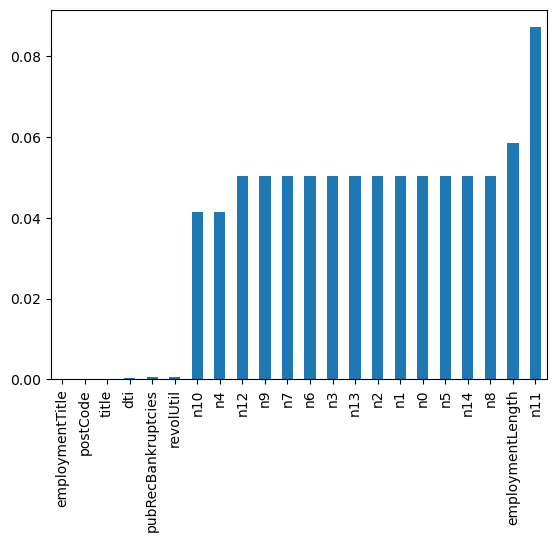

In [123]:
# 查看数据确实情况
missing = data_train.isnull().sum()/len(data_train)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [125]:
# 查看那些数据具有唯一数值
one_value_fea = [col for col in data_train.columns if data_train[col].nunique() <= 1]
one_value_fea_test = [col for col in data_test.columns if data_test[col].nunique() <= 1]
display(one_value_fea, one_value_fea)
data_train["policyCode"].unique()

# 结论：删掉policyCode特征

['policyCode']

['policyCode']

array([1.])

In [129]:
# 区分类别和数值型变量
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))
print("numerical_fea", numerical_fea)
print("category_fea", category_fea)

# 划分数值型变量中的连续变量和离散型变量
#过滤数值型类别特征，经验认为如果类别小于10，那么倾向于是离散型特征
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea,numerical_noserial_fea
numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(data_train,numerical_fea)
print("numerical_serial_fea", numerical_serial_fea)
print("numerical_noserial_fea", numerical_noserial_fea)

numerical_fea ['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'employmentTitle', 'homeOwnership', 'annualIncome', 'verificationStatus', 'isDefault', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']
category_fea ['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']
numerical_serial_fea ['id', 'loanAmnt', 'interestRate', 'installment', 'employmentTitle', 'annualIncome', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'title', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n13', 'n14']
numerical_noserial_fea ['term', 'homeOwn

In [130]:
data_train['term'].value_counts()#离散型变量

term
3    606902
5    193098
Name: count, dtype: int64

In [131]:
data_train['homeOwnership'].value_counts()#离散型变量

homeOwnership
0    395732
1    317660
2     86309
3       185
5        81
4        33
Name: count, dtype: int64

In [132]:
data_train['verificationStatus'].value_counts()#离散型变量

verificationStatus
1    309810
2    248968
0    241222
Name: count, dtype: int64

In [133]:
data_train['initialListStatus'].value_counts()#离散型变量

initialListStatus
0    466438
1    333562
Name: count, dtype: int64

In [134]:
data_train['applicationType'].value_counts()#离散型变量

applicationType
0    784586
1     15414
Name: count, dtype: int64

In [135]:
data_train['n11'].value_counts()#离散型变量，相差悬殊，用不用再分析

n11
0.0    729682
1.0       540
2.0        24
4.0         1
3.0         1
Name: count, dtype: int64

In [136]:
data_train['n12'].value_counts()#离散型变量，相差悬殊，用不用再分析

n12
0.0    757315
1.0      2281
2.0       115
3.0        16
4.0         3
Name: count, dtype: int64

/Users/wzq/anaconda3/envs/torch/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


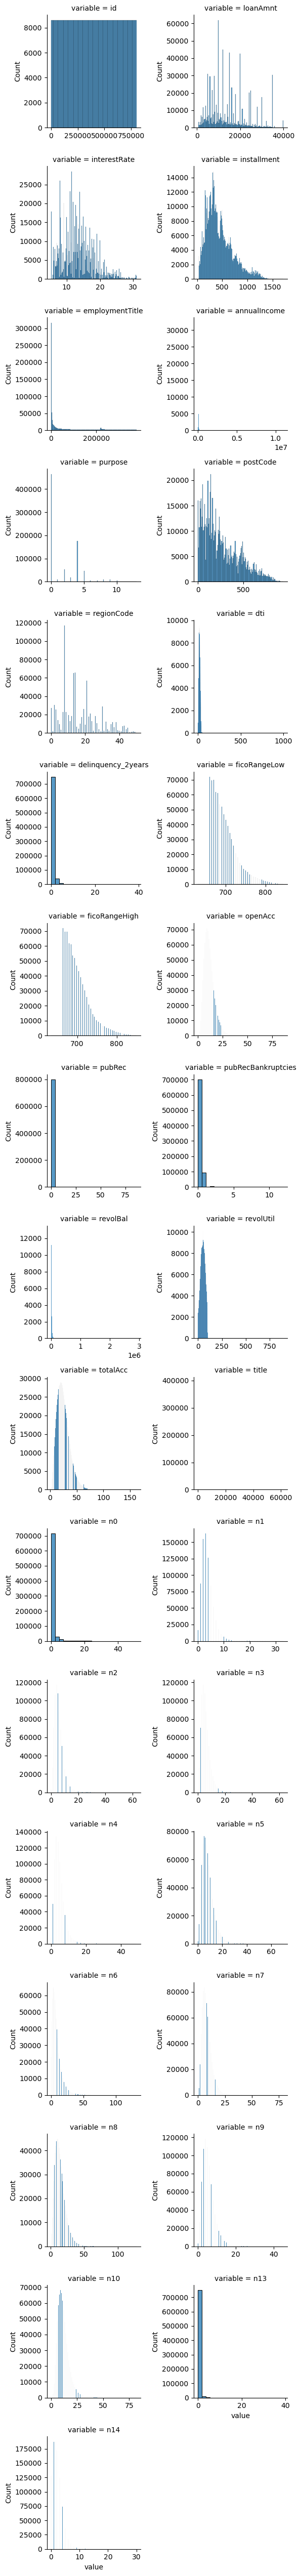

In [141]:
# 数值连续型变量分析
#每个数字特征得分布可视化
f = pd.melt(data_train, value_vars=numerical_serial_fea)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.histplot, "value")

In [143]:
# 非数值类别型变量分析
data_train['grade'].value_counts()

grade
B    233690
C    227118
A    139661
D    119453
E     55661
F     19053
G      5364
Name: count, dtype: int64

In [144]:
data_train['subGrade'].value_counts()

subGrade
C1    50763
B4    49516
B5    48965
B3    48600
C2    47068
C3    44751
C4    44272
B2    44227
B1    42382
C5    40264
A5    38045
A4    30928
D1    30538
D2    26528
A1    25909
D3    23410
A3    22655
A2    22124
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: count, dtype: int64

In [145]:
data_train['employmentLength'].value_counts()

employmentLength
10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: count, dtype: int64

In [146]:
data_train['issueDate'].value_counts()

issueDate
2016-03-01    29066
2015-10-01    25525
2015-07-01    24496
2015-12-01    23245
2014-10-01    21461
2016-02-01    20571
2015-11-01    19453
2015-01-01    19254
2015-04-01    18929
2015-08-01    18750
2015-05-01    17119
2016-01-01    16792
2014-07-01    16355
2015-06-01    15236
2015-09-01    14950
2016-04-01    14248
2014-11-01    13793
2015-03-01    13549
2016-08-01    13301
2015-02-01    12881
2016-07-01    12835
2016-06-01    12270
2016-12-01    11562
2016-10-01    11245
2016-11-01    11172
2014-05-01    10886
2014-04-01    10830
2016-05-01    10680
2014-08-01    10648
2016-09-01    10165
2017-03-01    10068
2017-01-01     9757
2014-06-01     9665
2014-03-01     9645
2017-05-01     9620
2014-01-01     9273
2017-08-01     9172
2014-02-01     9105
2017-06-01     9005
2013-12-01     8948
2017-07-01     8861
2013-11-01     8748
2013-10-01     8409
2017-09-01     8100
2017-02-01     8057
2017-04-01     7746
2013-09-01     7733
2013-08-01     7490
2017-11-01     7306
2017-10-01

In [149]:
data_train["employmentLength"].value_counts(dropna=False)[:20]

employmentLength
10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
NaN           46799
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: count, dtype: int64

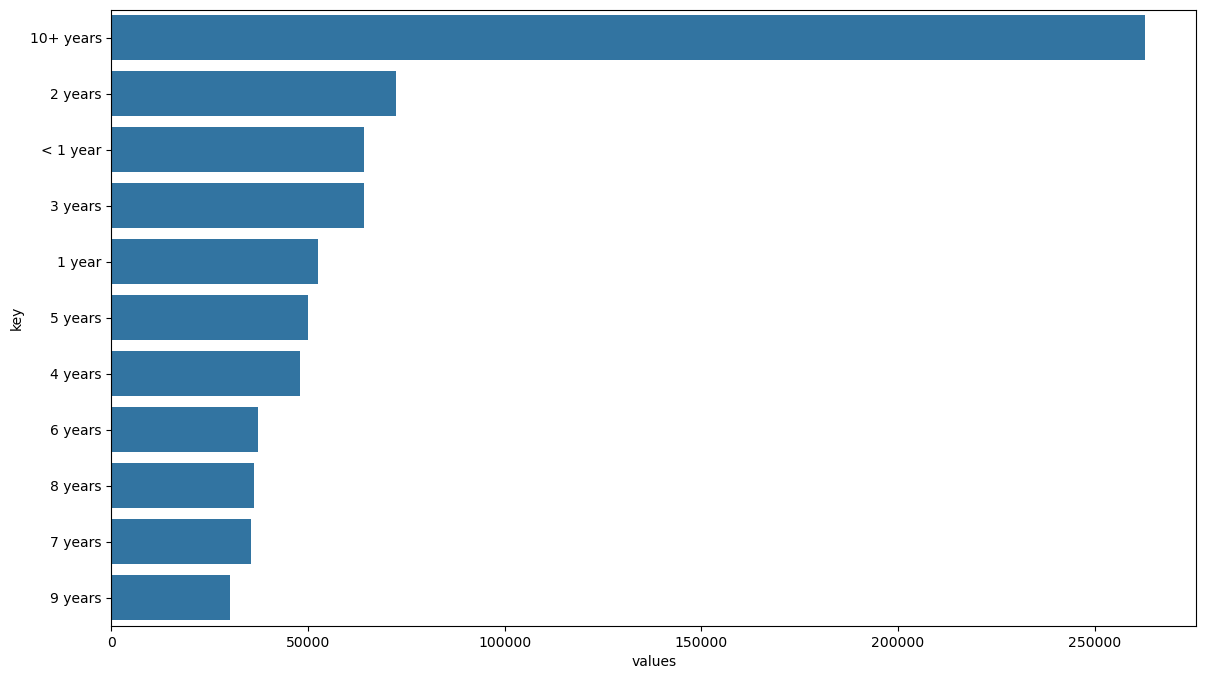

In [159]:
# 单一变量分布可视化
plt.figure(figsize=(14, 8))
employment_counts = data_train["employmentLength"].value_counts(dropna=False)[:20].reset_index()
employment_counts.columns = ['key', 'values']
sns.barplot(x='values', y='key', data=employment_counts)
plt.show()

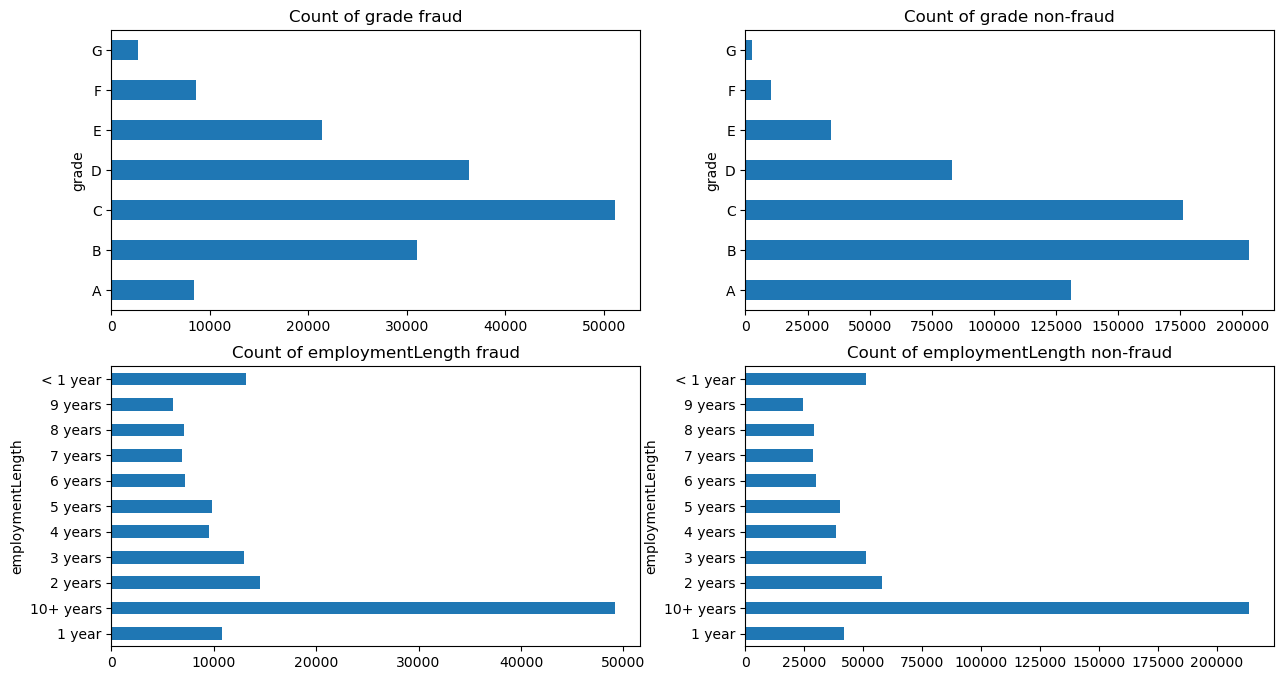

In [160]:
# 根绝y值不同可视化x某个特征的分布
## 首先查看类别型变量在不同y值上的分布
train_loan_fr = data_train.loc[data_train['isDefault'] == 1]
train_loan_nofr = data_train.loc[data_train['isDefault'] == 0]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))

train_loan_fr.groupby('grade')['grade'].count().plot(kind='barh', ax=ax1, title='Count of grade fraud')
train_loan_nofr.groupby('grade')['grade'].count().plot(kind='barh', ax=ax2, title='Count of grade non-fraud')
train_loan_fr.groupby('employmentLength')['employmentLength'].count().plot(kind='barh', ax=ax3, title='Count of employmentLength fraud')
train_loan_nofr.groupby('employmentLength')['employmentLength'].count().plot(kind='barh', ax=ax4, title='Count of employmentLength non-fraud')
plt.show()

<Axes: title={'center': 'Log Loan Amt - Not Fraud'}, ylabel='Frequency'>

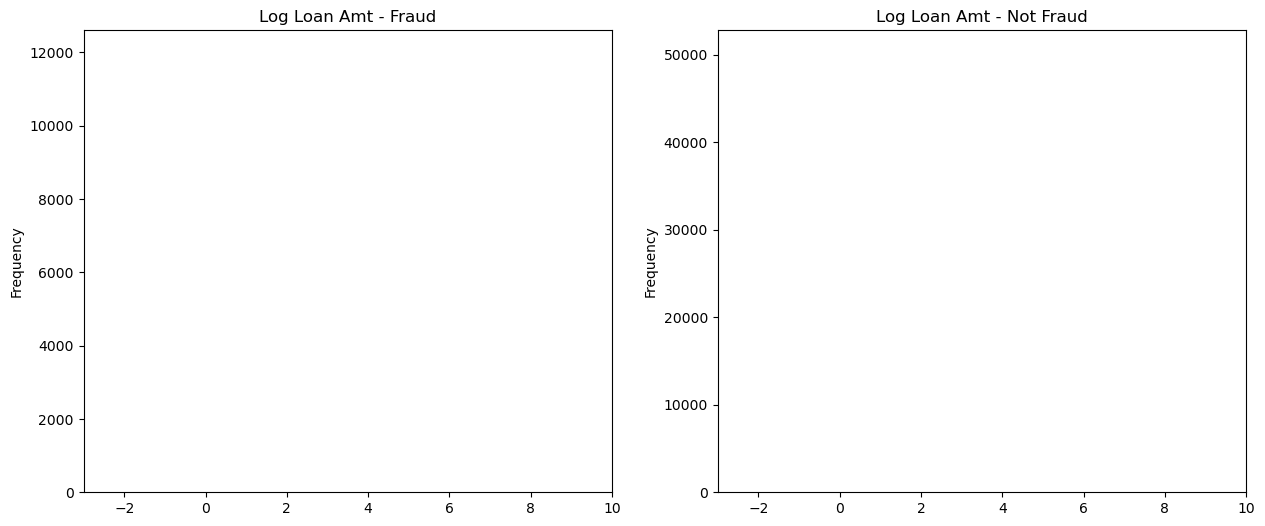

In [163]:
# 其次查看连续型变量在不同y值上的分布
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 6))
data_train.loc[data_train['isDefault'] == 1] \
    ['loanAmnt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Fraud',
          color='r',
          xlim=(-3, 10),
         ax= ax1)
data_train.loc[data_train['isDefault'] == 0] \
    ['loanAmnt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Not Fraud',
          color='b',
          xlim=(-3, 10),
         ax=ax2)

<Axes: title={'center': 'Log Loan Amt - Not Fraud'}, ylabel='Frequency'>

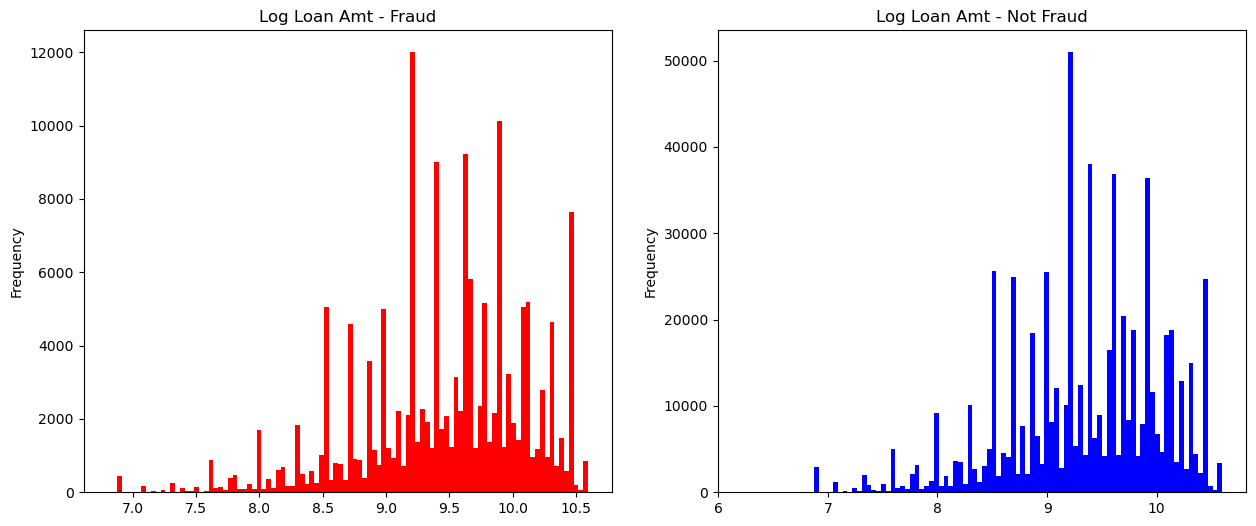

In [166]:
# 其次查看连续型变量在不同y值上的分布
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 6))
data_train.loc[data_train['isDefault'] == 1] \
    ['loanAmnt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Fraud',
          color='r',
         ax= ax1)
data_train.loc[data_train['isDefault'] == 0] \
    ['loanAmnt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Not Fraud',
          color='b',
         ax=ax2)

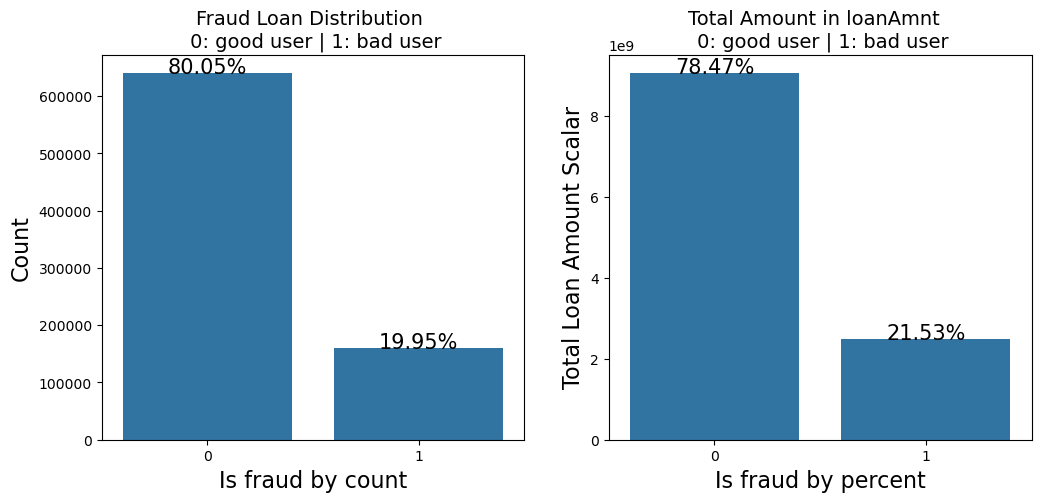

In [172]:
total = len(data_train)

plt.figure(figsize=(12,5))
plt.subplot(121)##1代表行，2代表列，所以一共有2个图，1代表此时绘制第一个图。
plot_tr = sns.countplot(x='isDefault',data=data_train)#data_train‘isDefault’这个特征每种类别的数量**
plot_tr.set_title("Fraud Loan Distribution \n 0: good user | 1: bad user", fontsize=14)
plot_tr.set_xlabel("Is fraud by count", fontsize=16)
plot_tr.set_ylabel('Count', fontsize=16)
for p in plot_tr.patches:
    height = p.get_height()
    plot_tr.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
    

total_amt = data_train.groupby(['isDefault'])['loanAmnt'].sum().sum()
percent_amt = (data_train.groupby(['isDefault'])['loanAmnt'].sum())
percent_amt = percent_amt.reset_index()
plt.subplot(122)
plot_tr_2 = sns.barplot(x='isDefault', y='loanAmnt',  dodge=True, data=percent_amt)
plot_tr_2.set_title("Total Amount in loanAmnt  \n 0: good user | 1: bad user", fontsize=14)
plot_tr_2.set_xlabel("Is fraud by percent", fontsize=16)
plot_tr_2.set_ylabel('Total Loan Amount Scalar', fontsize=16)
for p in plot_tr_2.patches:
    height = p.get_height()
    plot_tr_2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_amt * 100),
            ha="center", fontsize=15)

In [ ]:
# 不能在notebook中运行
# from ydata_profiling import ProfileReport

# profile = ProfileReport(data_train, title="Profiling Report")
# profile.to_file("./data/profile.html")

In [6]:
number_cols = ["loanAmnt", "term", "interestRate", "installment", "employmentTitle", "annualIncome",
               "dti", "delinquency_2years", "ficoRangeLow", "ficoRangeHigh", "openAcc", "pubRec", 
               "pubRecBankruptcies", "revolBal", "revolUtil", "totalAcc", "employmentLength"] + ["n{}".format(i) for i in range(15)]
time_cols = ["issueDate", "earliesCreditLine"]
# employmentLength 需要特殊处理
category_cols = ["id", "grade", "subGrade", "homeOwnership", "verificationStatus", "purpose", "postCode",
                 "regionCode", "initialListStatus", "applicationType", "title"]
number_cols, time_cols, category_cols
len(number_cols + time_cols + category_cols)

# 去掉 'years' 或 'year' 字样，处理 '10+ years'
def clean_experience(value):
    if pd.isna(value):  # 处理 NaN
        return np.nan
    value = value.replace('years', '').replace('year', '').strip()
    if '+' in value:  # 处理 10+ years
        return int(value.replace('+', ''))
    if '<' in value:
        return 0
    return int(value)

data['employmentLength'] = data['employmentLength'].apply(clean_experience)

# 处理空值
# data[number_cols] = data[number_cols].fillna(0)
# data[category_cols] = data[category_cols].fillna(-1)
#按照中位数填充数值型特征
data[number_cols] = data[number_cols].fillna(data[number_cols].median())
#按照众数填充类别型特征
data[category_cols] = data[category_cols].fillna(data[category_cols].mode())

# 时间处理
data['issueDate'] = pd.to_datetime(data['issueDate'])
# 拆分特征
data['issueDate_year'] = data['issueDate'].dt.year
data['issueDate_month'] = data['issueDate'].dt.month
data['issueDate_day'] = data['issueDate'].dt.day
data['issueDate_weekday'] = data['issueDate'].dt.weekday  # 周一为0，周日为6
data['issueDate_is_weekend'] = (data['issueDate_weekday'] >= 5).astype(int)

data["earliesCreditLine"] = pd.to_datetime(data["earliesCreditLine"], format="%b-%Y")
data["earliesCreditLine_year"] = data["earliesCreditLine"].dt.year
data["earliesCreditLine_month"] = data["earliesCreditLine"].dt.month
display(data.head(5))
display(data.tail(5))

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,issueDate_year,issueDate_month,issueDate_day,issueDate_weekday,issueDate_is_weekend,earliesCreditLine_year,earliesCreditLine_month
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2.0,2,110000.0,2,2014-07-01,1.0,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,2001-08-01,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0,2014,7,1,1,0,2001,8
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5.0,0,46000.0,2,2012-08-01,0.0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,2002-05-01,1723.0,1.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,2012,8,1,2,0,2002,5
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8.0,0,74000.0,2,2015-10-01,0.0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,2006-05-01,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0,2015,10,1,3,0,2006,5
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10.0,1,118000.0,1,2015-08-01,0.0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,1999-05-01,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0,2015,8,1,5,1,1999,5
4,4,3000.0,3,12.99,101.07,C,C2,54.0,0.0,1,29000.0,2,2016-03-01,0.0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,1977-08-01,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0,2016,3,1,1,0,1977,8


,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,issueDate_year,issueDate_month,issueDate_day,issueDate_weekday,issueDate_is_weekend,earliesCreditLine_year,earliesCreditLine_month
199995,999995,7000.0,3,11.14,229.64,B,B2,330967.0,7.0,1,30000.0,2,2012-10-01,NaN,4,36.0,13,32.92,0.0,685.0,689.0,8.0,0.0,0.0,5021.0,54.0,17.0,1,0,2005-11-01,52663.0,1.0,0.0,2.0,2.0,2.0,2.0,6.0,11.0,2.0,6.0,2.0,8.0,0.0,0.0,0.0,4.0,2012,10,1,0,0,2005,11
199996,999996,6000.0,3,6.24,183.19,A,A2,38930.0,1.0,1,56000.0,0,2015-10-01,NaN,0,261.0,8,20.38,0.0,720.0,724.0,25.0,0.0,0.0,10163.0,35.9,27.0,0,0,2006-10-01,0.0,1.0,0.0,5.0,6.0,6.0,5.0,5.0,14.0,12.0,13.0,6.0,25.0,0.0,0.0,0.0,0.0,2015,10,1,3,0,2006,10
199997,999997,14000.0,5,15.88,339.57,C,C4,282016.0,8.0,2,80000.0,2,2013-07-01,NaN,4,46.0,27,15.12,0.0,675.0,679.0,21.0,0.0,0.0,31401.0,86.0,63.0,0,0,2001-12-01,4.0,1.0,0.0,7.0,13.0,13.0,9.0,21.0,18.0,21.0,42.0,13.0,21.0,0.0,0.0,0.0,0.0,2013,7,1,0,0,2001,12
199998,999998,8000.0,3,18.06,289.47,D,D2,97.0,4.0,1,190000.0,0,2017-10-01,NaN,0,99.0,8,9.33,0.0,690.0,694.0,11.0,0.0,0.0,28493.0,64.0,24.0,0,0,2005-08-01,0.0,1.0,0.0,3.0,6.0,6.0,4.0,12.0,5.0,8.0,19.0,6.0,11.0,0.0,0.0,0.0,2.0,2017,10,1,6,1,2005,8
199999,999999,8000.0,3,6.68,245.85,A,A3,320.0,7.0,1,46000.0,0,2015-02-01,NaN,4,31.0,2,6.47,0.0,715.0,719.0,4.0,0.0,0.0,7608.0,65.6,10.0,0,0,2002-08-01,4.0,1.0,0.0,2.0,2.0,2.0,2.0,3.0,4.0,3.0,4.0,2.0,4.0,0.0,0.0,0.0,0.0,2015,2,1,6,1,2002,8


In [7]:
# sparse_features = ["id", "homeOwnership", "verificationStatus", "purpose", "postCode",
#                  "regionCode", "initialListStatus", "title"]
dense_features = ["loanAmnt", "term", "interestRate", "installment", "annualIncome",
                    "dti", "delinquency_2years", "ficoRangeLow", "ficoRangeHigh", "openAcc", "pubRec", 
                    "pubRecBankruptcies", "revolBal", "revolUtil", "totalAcc", "employmentLength"] \
                    + ["issueDate_year", "issueDate_month", "issueDate_day", "issueDate_weekday", "issueDate_is_weekend", "earliesCreditLine_year", "earliesCreditLine_month"] \
                    + ["n{}".format(i) for i in range(15)]
sparse_features = ["employmentTitle", "grade", "subGrade", "postCode", "title"]
# 对稀疏的类别特征进行简单的处理，处理为连续整数类别
for feat in sparse_features:
    lbe = LabelEncoder()
    data[feat] = lbe.fit_transform(data[feat])
# display(data.head(5))
# display(data.tail(5))

mms = MinMaxScaler(feature_range=(0, 1))
data[dense_features] = mms.fit_transform(data[dense_features])

# display(data.head(5))
# display(data.tail(5))

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,issueDate_year,issueDate_month,issueDate_day,issueDate_weekday,issueDate_is_weekend,earliesCreditLine_year,earliesCreditLine_month
0,0,35000.0,5,19.52,917.97,4,21,305,2.0,2,110000.0,2,2014-07-01,1.0,1,138,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,2001-08-01,2,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0,2014,7,1,1,0,2001,8
1,1,18000.0,5,18.49,461.90,3,16,176661,5.0,0,46000.0,2,2012-08-01,0.0,0,157,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,2002-05-01,1510,1.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,2012,8,1,2,0,2002,5
2,2,12000.0,5,16.99,298.17,3,17,27721,8.0,0,74000.0,2,2015-10-01,0.0,0,338,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,2006-05-01,1,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0,2015,10,1,3,0,2006,5
3,3,11000.0,3,7.26,340.96,0,3,40375,10.0,1,118000.0,1,2015-08-01,0.0,4,149,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,1999-05-01,5,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0,2015,8,1,5,1,1999,5
4,4,3000.0,3,12.99,101.07,2,11,51,0.0,1,29000.0,2,2016-03-01,0.0,10,302,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,1977-08-01,12,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0,2016,3,1,1,0,1977,8


,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,issueDate_year,issueDate_month,issueDate_day,issueDate_weekday,issueDate_is_weekend,earliesCreditLine_year,earliesCreditLine_month
199995,999995,7000.0,3,11.14,229.64,1,6,262658,7.0,1,30000.0,2,2012-10-01,NaN,4,37,13,32.92,0.0,685.0,689.0,8.0,0.0,0.0,5021.0,54.0,17.0,1,0,2005-11-01,41174,1.0,0.0,2.0,2.0,2.0,2.0,6.0,11.0,2.0,6.0,2.0,8.0,0.0,0.0,0.0,4.0,2012,10,1,0,0,2005,11
199996,999996,6000.0,3,6.24,183.19,0,1,33779,1.0,1,56000.0,0,2015-10-01,NaN,0,262,8,20.38,0.0,720.0,724.0,25.0,0.0,0.0,10163.0,35.9,27.0,0,0,2006-10-01,1,1.0,0.0,5.0,6.0,6.0,5.0,5.0,14.0,12.0,13.0,6.0,25.0,0.0,0.0,0.0,0.0,2015,10,1,3,0,2006,10
199997,999997,14000.0,5,15.88,339.57,2,13,225414,8.0,2,80000.0,2,2013-07-01,NaN,4,47,27,15.12,0.0,675.0,679.0,21.0,0.0,0.0,31401.0,86.0,63.0,0,0,2001-12-01,5,1.0,0.0,7.0,13.0,13.0,9.0,21.0,18.0,21.0,42.0,13.0,21.0,0.0,0.0,0.0,0.0,2013,7,1,0,0,2001,12
199998,999998,8000.0,3,18.06,289.47,3,16,94,4.0,1,190000.0,0,2017-10-01,NaN,0,100,8,9.33,0.0,690.0,694.0,11.0,0.0,0.0,28493.0,64.0,24.0,0,0,2005-08-01,1,1.0,0.0,3.0,6.0,6.0,4.0,12.0,5.0,8.0,19.0,6.0,11.0,0.0,0.0,0.0,2.0,2017,10,1,6,1,2005,8
199999,999999,8000.0,3,6.68,245.85,0,2,305,7.0,1,46000.0,0,2015-02-01,NaN,4,32,2,6.47,0.0,715.0,719.0,4.0,0.0,0.0,7608.0,65.6,10.0,0,0,2002-08-01,5,1.0,0.0,2.0,2.0,2.0,2.0,3.0,4.0,3.0,4.0,2.0,4.0,0.0,0.0,0.0,0.0,2015,2,1,6,1,2002,8


,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,issueDate_year,issueDate_month,issueDate_day,issueDate_weekday,issueDate_is_weekend,earliesCreditLine_year,earliesCreditLine_month
0,0,0.873418,1.0,0.553349,0.531301,4,21,305,0.2,2,0.010001,2,2014-07-01,1.0,1,138,32,0.01805,0.0,0.477273,0.475113,0.077778,0.0,0.0,0.008323,0.054802,0.15625,0,0,2001-08-01,2,1.0,0.000000,0.060606,0.031746,0.031746,0.063492,0.128571,0.060606,0.048193,0.093750,0.044444,0.077778,0.0,0.0,0.0,0.066667,0.636364,0.545455,0.0,0.166667,0.0,0.802817,0.636364
1,1,0.443038,1.0,0.513240,0.263246,3,16,176661,0.5,0,0.004182,2,2012-08-01,0.0,0,157,18,0.02883,0.0,0.340909,0.339367,0.144444,0.0,0.0,0.005197,0.043595,0.10000,1,0,2002-05-01,1510,1.0,0.000000,0.000000,0.000000,0.000000,0.158730,0.000000,0.000000,0.000000,0.000000,0.000000,0.144444,0.0,0.0,0.0,0.000000,0.454545,0.636364,0.0,0.333333,0.0,0.816901,0.363636
2,2,0.291139,1.0,0.454829,0.167014,3,17,27721,0.8,0,0.006728,2,2015-10-01,0.0,0,338,14,0.02377,0.0,0.227273,0.226244,0.122222,0.0,0.0,0.001586,0.058052,0.15625,0,0,2006-05-01,1,1.0,0.000000,0.000000,0.047619,0.047619,0.000000,0.000000,0.159091,0.048193,0.039062,0.066667,0.122222,0.0,0.0,0.0,0.133333,0.727273,0.818182,0.0,0.500000,0.0,0.873239,0.363636
3,3,0.265823,0.0,0.075935,0.192164,0,3,40375,1.0,1,0.010728,1,2015-08-01,0.0,4,149,11,0.01821,0.0,0.272727,0.271493,0.100000,0.0,0.0,0.003425,0.058949,0.16250,1,0,1999-05-01,5,1.0,0.117647,0.121212,0.095238,0.095238,0.063492,0.228571,0.030303,0.084337,0.164062,0.133333,0.100000,0.0,0.0,0.0,0.033333,0.727273,0.636364,0.0,0.833333,1.0,0.774648,0.363636
4,4,0.063291,0.0,0.299065,0.051169,2,11,51,0.0,1,0.002637,2,2016-03-01,0.0,10,302,21,0.03316,0.0,0.295455,0.294118,0.133333,0.0,0.0,0.001013,0.035862,0.15625,0,0,1977-08-01,12,1.0,0.019608,0.060606,0.111111,0.111111,0.031746,0.057143,0.068182,0.120482,0.117188,0.155556,0.133333,0.0,0.0,0.0,0.133333,0.818182,0.181818,0.0,0.166667,0.0,0.464789,0.636364


,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,issueDate_year,issueDate_month,issueDate_day,issueDate_weekday,issueDate_is_weekend,earliesCreditLine_year,earliesCreditLine_month
199995,999995,0.164557,0.0,0.227025,0.126736,1,6,262658,0.7,1,0.002727,2,2012-10-01,NaN,4,37,13,0.03392,0.0,0.272727,0.271493,0.088889,0.0,0.0,0.001728,0.060518,0.09375,1,0,2005-11-01,41174,1.0,0.0,0.060606,0.031746,0.031746,0.031746,0.085714,0.083333,0.024096,0.046875,0.044444,0.088889,0.0,0.0,0.0,0.133333,0.454545,0.818182,0.0,0.0,0.0,0.859155,0.909091
199996,999996,0.139241,0.0,0.036215,0.099435,0,1,33779,0.1,1,0.005091,0,2015-10-01,NaN,0,262,8,0.02138,0.0,0.431818,0.429864,0.277778,0.0,0.0,0.003499,0.040233,0.15625,0,0,2006-10-01,1,1.0,0.0,0.151515,0.095238,0.095238,0.079365,0.071429,0.106061,0.144578,0.101562,0.133333,0.277778,0.0,0.0,0.0,0.000000,0.727273,0.818182,0.0,0.5,0.0,0.873239,0.818182
199997,999997,0.341772,1.0,0.411604,0.191347,2,13,225414,0.8,2,0.007273,2,2013-07-01,NaN,4,47,27,0.01612,0.0,0.227273,0.226244,0.233333,0.0,0.0,0.010810,0.096380,0.38125,0,0,2001-12-01,5,1.0,0.0,0.212121,0.206349,0.206349,0.142857,0.300000,0.136364,0.253012,0.328125,0.288889,0.233333,0.0,0.0,0.0,0.000000,0.545455,0.545455,0.0,0.0,0.0,0.802817,1.000000
199998,999998,0.189873,0.0,0.496495,0.161901,3,16,94,0.4,1,0.017274,0,2017-10-01,NaN,0,100,8,0.01033,0.0,0.295455,0.294118,0.122222,0.0,0.0,0.009809,0.071725,0.13750,0,0,2005-08-01,1,1.0,0.0,0.090909,0.095238,0.095238,0.063492,0.171429,0.037879,0.096386,0.148438,0.133333,0.122222,0.0,0.0,0.0,0.066667,0.909091,0.818182,0.0,1.0,1.0,0.859155,0.636364
199999,999999,0.189873,0.0,0.053349,0.136263,0,2,305,0.7,1,0.004182,0,2015-02-01,NaN,4,32,2,0.00747,0.0,0.409091,0.407240,0.044444,0.0,0.0,0.002619,0.073518,0.05000,0,0,2002-08-01,5,1.0,0.0,0.060606,0.031746,0.031746,0.031746,0.042857,0.030303,0.036145,0.031250,0.044444,0.044444,0.0,0.0,0.0,0.000000,0.727273,0.090909,0.0,1.0,1.0,0.816901,0.636364


In [10]:
data[number_cols].median()

loanAmnt                 0.291139
term                     0.000000
interestRate             0.289330
installment              0.212394
employmentTitle       7042.000000
annualIncome             0.005910
dti                      0.018610
delinquency_2years       0.000000
ficoRangeLow             0.295455
ficoRangeHigh            0.294118
openAcc                  0.122222
pubRec                   0.000000
pubRecBankruptcies       0.000000
revolBal                 0.003833
revolUtil                0.058501
totalAcc                 0.131250
employmentLength         0.600000
n0                       0.000000
n1                       0.090909
n2                       0.079365
n3                       0.079365
n4                       0.063492
n5                       0.100000
n6                       0.045455
n7                       0.084337
n8                       0.101562
n9                       0.111111
n10                      0.111111
n11                      0.000000
n12           

## 检测异常的方法一
在统计学中，如果一个数据分布近似正态，那么大约 68% 的数据值会在均值的一个标准差范围内，大约 95% 会在两个标准差范围内，大约 99.7% 会在三个标准差范围内。

In [13]:
data = pd.read_csv('./data/data_processed_v6.csv')
features = [f for f in data.columns if f not in ["id", "earliesCreditLine", "policyCode"]]
data = data[features]


train_data = data.iloc[:800000, :]
def find_outliers_by_3segama(data, fea):
    data_std = np.std(data[fea])
    data_mean = np.mean(data[fea])
    outliers_cut_off = data_std * 3
    lower_rule = data_mean - outliers_cut_off
    upper_rule = data_mean + outliers_cut_off
    data[fea+'_outliers'] = data[fea].apply(lambda x:str('异常值') if x > upper_rule or x < lower_rule else '正常值')
    return data


for fea in features:
    train_data = find_outliers_by_3segama(train_data,fea)
    print(fea)
    print(train_data[fea+'_outliers'].value_counts())
    print(train_data.groupby(fea+'_outliers')['isDefault'].sum())
    print('#' * 50)


In [10]:
#删除异常值
for fea in features:
    train_data = train_data[train_data[fea+'_outliers']=='正常值']
    train_data = train_data.reset_index(drop=True)

In [12]:
train_data.shape

(595576, 98)

In [197]:
# data.iloc[:train_size,:].to_csv('./data/train_processed.csv')
# data.iloc[train_size:,:].to_csv('./data/test_processed.csv')
data.to_csv ('./data/data_processed.csv', index=False)

## 分析下v8数据为啥过拟合